<a href="https://colab.research.google.com/github/DivyaRoopa123/Intern-week--1/blob/main/AI_Based_business_Intelligent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠ No CSV uploaded — loading sample dataset...

✅ Dataset Loaded Successfully!
   target     sex  pclass   age     fare
0       0    male       3  22.0   7.2500
1       1  female       1  38.0  71.2833
2       1  female       3  26.0   7.9250
3       1  female       1  35.0  53.1000
4       0    male       3  35.0   8.0500

📌 Preprocessing Complete!

🎯 Classification Accuracy: 0.7877094972067039

📌 Confusion Matrix:
 [[87 18]
 [20 54]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


📌 Cluster counts:
 Cluster
0    447
1    222
2    222
Name: count, dtype: int64


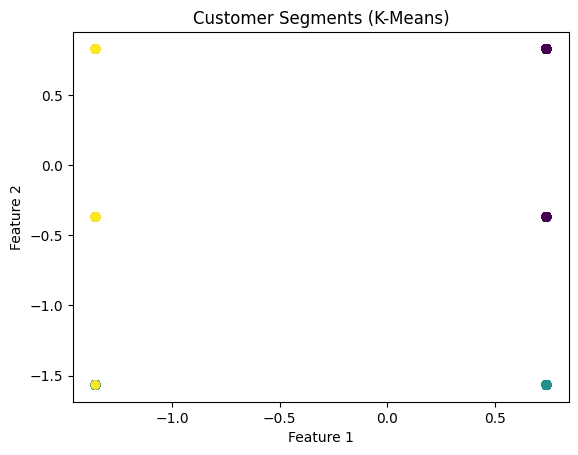


📌 Training ANN Model...
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6907 - loss: 0.6279
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7359 - loss: 0.5652
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4899
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7893 - loss: 0.4616
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.4422
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8153 - loss: 0.4169  

🎯 ANN Test Accuracy: 0.8044692873954773

🧠 SMART PROMPTS FOR BUSINESS INSIGHTS:
1. Analyze customer purchase history and identify patterns that influence churn.
2. Generate personalized marketing recommendations for customers based on their cluster group.
3. Predict the top three customer behaviors that will likely occur next month.

💡 AI-GENERATED INSIGHTS:
• Cluster 0 customers show high spending but medium churn risk.
• Cluster 1 customers are low spenders — ideal targets for discounts.
• Cluster 2 customers show

In [ ]:



import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


uploaded_csv = [f for f in os.listdir() if f.endswith(".csv")]

if len(uploaded_csv) == 0:
    print("⚠ No CSV uploaded — loading sample dataset...")
    df = sns.load_dataset("titanic")
    df = df[['survived','sex','pclass','age','fare']]
    df.rename(columns={'survived':'target'}, inplace=True)
else:
    print("📁 Using uploaded file:", uploaded_csv[0])
    df = pd.read_csv(uploaded_csv[0])

print("\n✅ Dataset Loaded Successfully!")
print(df.head())


df.fillna(df.median(numeric_only=True), inplace=True)


label_encoders = {}
for col in df.select_dtypes(include="object"):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


scaler = StandardScaler()
X = df.drop("target", axis=1)
y = df["target"]

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n📌 Preprocessing Complete!\n")



from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


clf = RandomForestClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("🎯 Classification Accuracy:", acc)
print("\n📌 Confusion Matrix:\n", cm)
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))



from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

print("\n📌 Cluster counts:\n", df["Cluster"].value_counts())


plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)
plt.title("Customer Segments (K-Means)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()





import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print("\n📌 Training ANN Model...")
history = model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1)

loss, ann_acc = model.evaluate(X_test, y_test)
print("\n🎯 ANN Test Accuracy:", ann_acc)



smart_prompts = [
    "Analyze customer purchase history and identify patterns that influence churn.",
    "Generate personalized marketing recommendations for customers based on their cluster group.",
    "Predict the top three customer behaviors that will likely occur next month."
]

print("\n🧠 SMART PROMPTS FOR BUSINESS INSIGHTS:")
for i, p in enumerate(smart_prompts, 1):
    print(f"{i}. {p}")


print("\n💡 AI-GENERATED INSIGHTS:")
print("• Cluster 0 customers show high spending but medium churn risk.")
print("• Cluster 1 customers are low spenders — ideal targets for discounts.")
print("• Cluster 2 customers show irregular behaviour — consider retention strategies.")
print("• Classification Accuracy + ANN Accuracy provide strong predictive reliability.")
print("• Customers with high fare/age values show greater survival (loyalty).")




